##Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
!pip install squarify
import squarify
import warnings
warnings.filterwarnings('ignore')

##Download the data set

In [4]:
df=pd.read_csv("Police_Department_Incidents_Previous_Year_2016.csv", engine='python')

In [5]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [6]:
df.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


##Check if there are any null values

In [7]:
df.isnull().sum()

,0
IncidntNum,0
Category,0
Descript,0
DayOfWeek,0
Date,0
Time,0
PdDistrict,1
Resolution,0
Address,0
X,0


##Different categories of crime

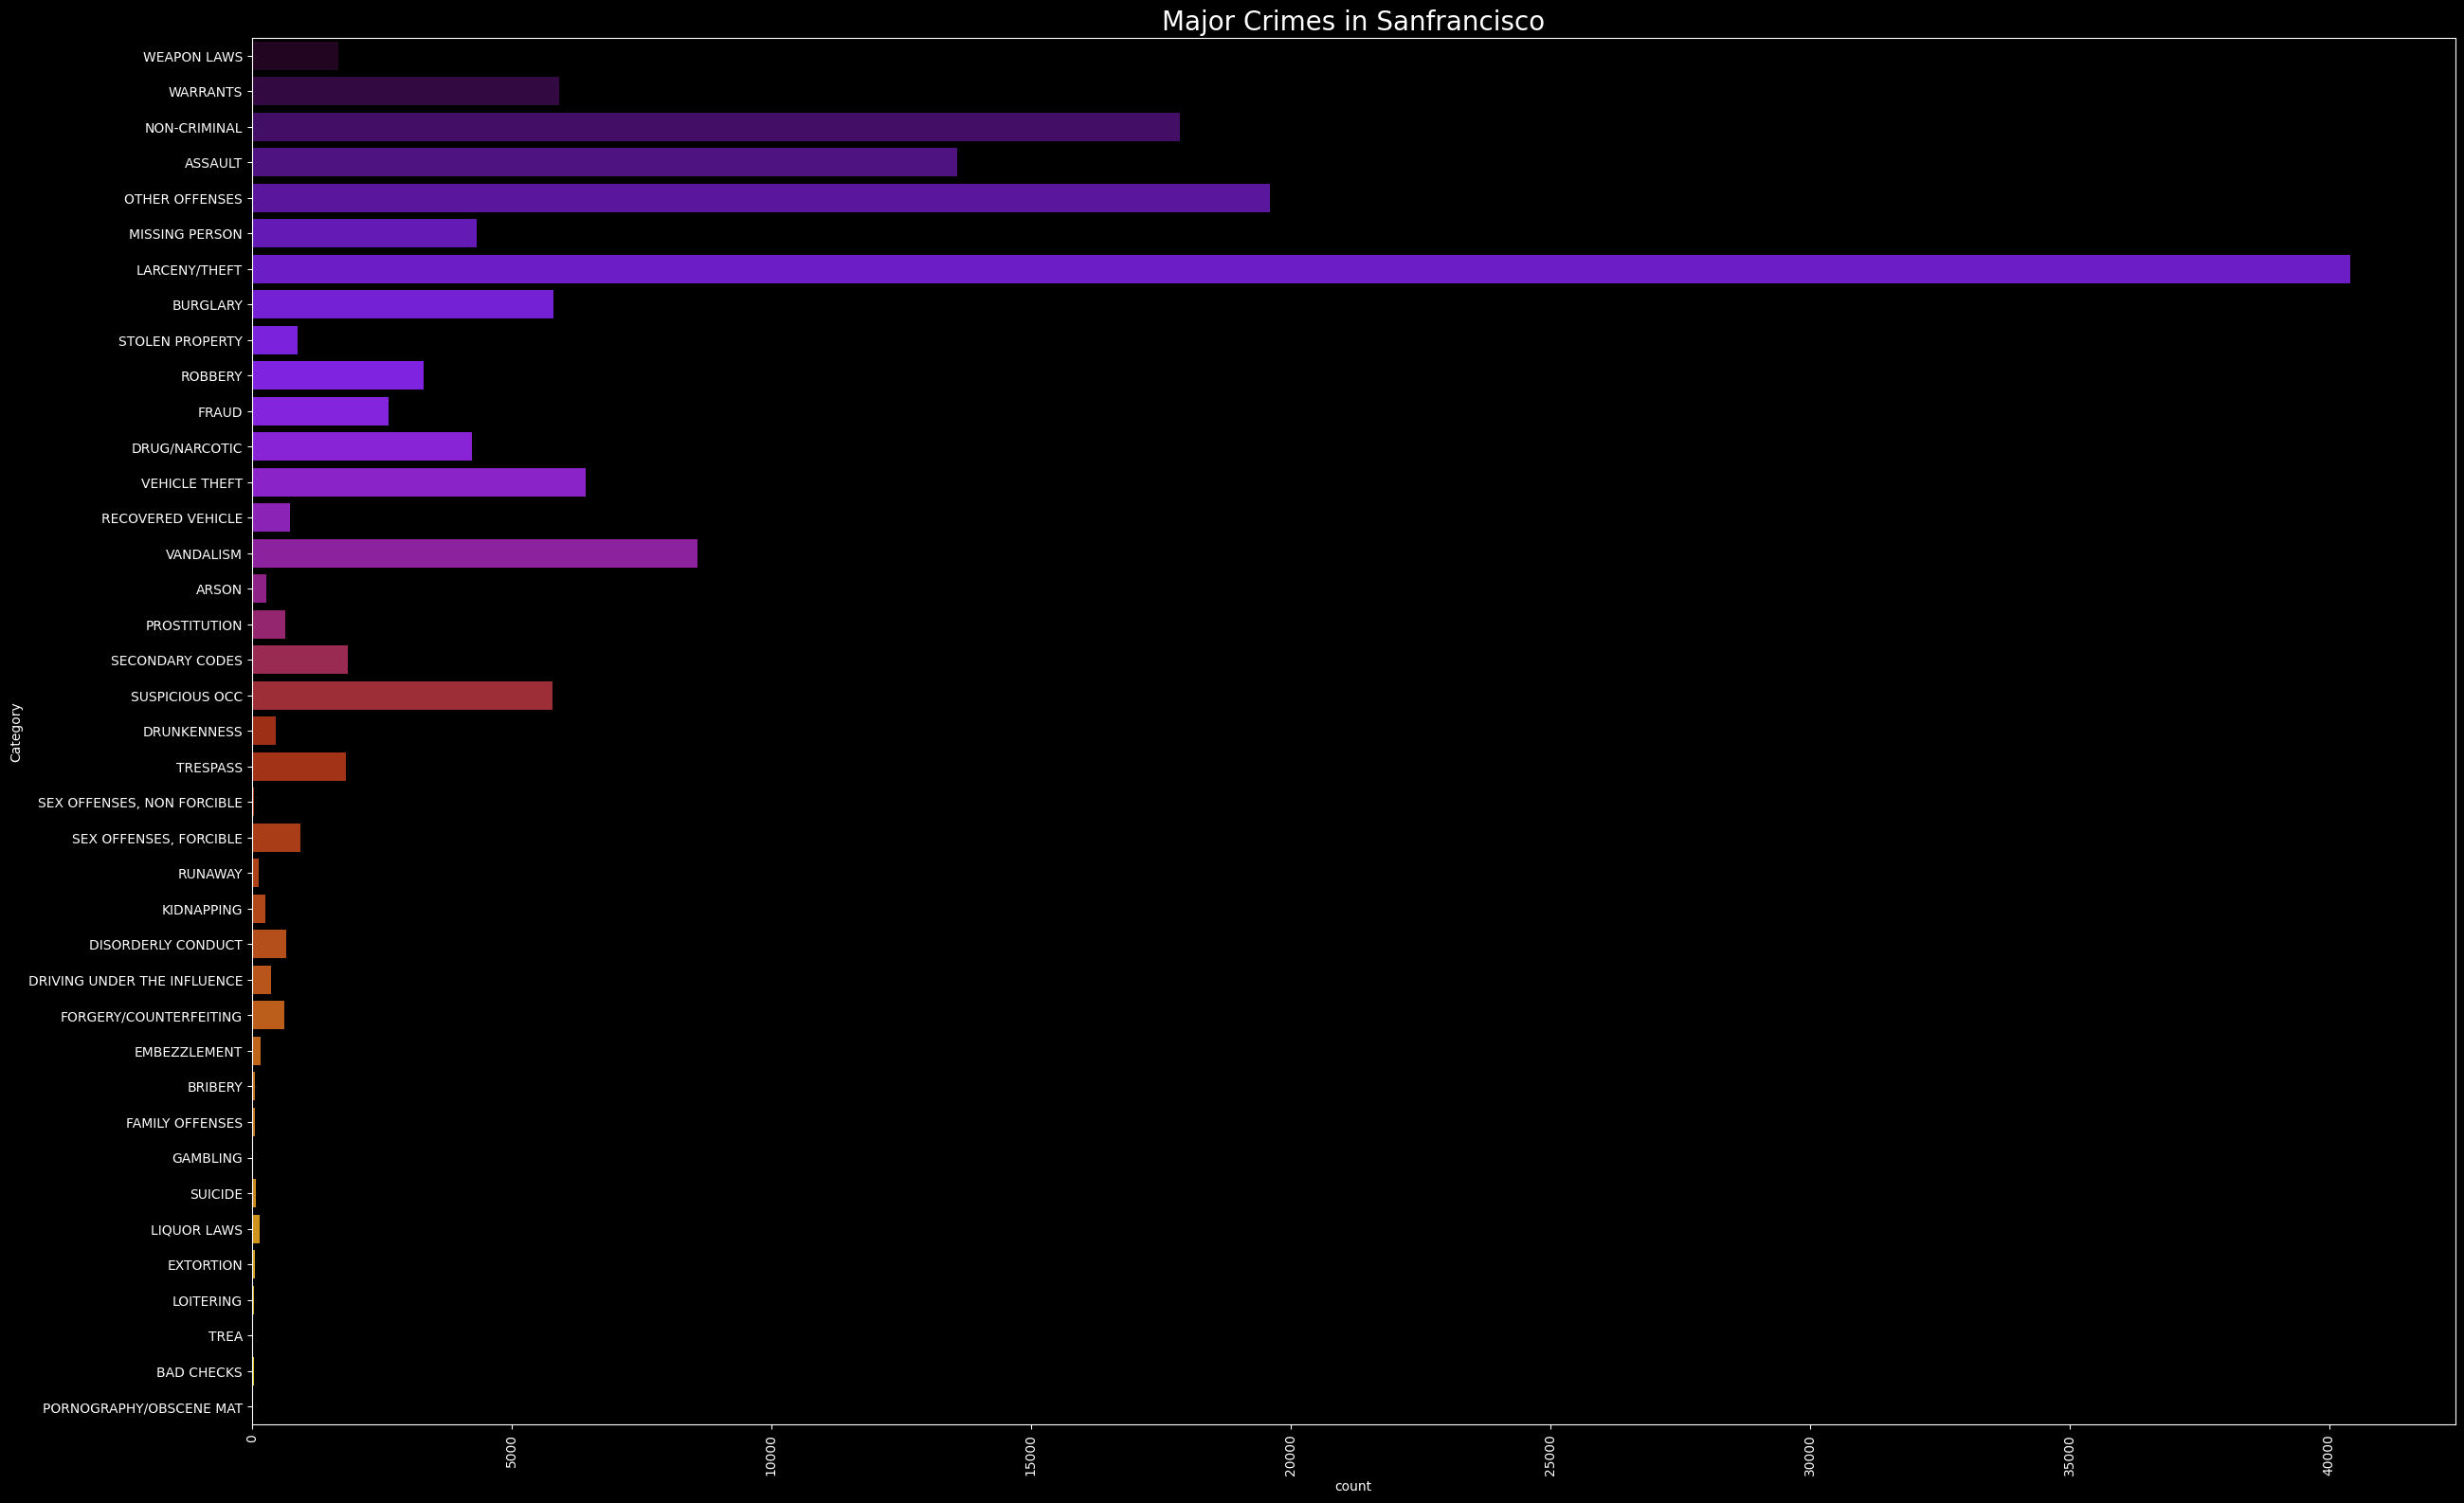

In [8]:
plt.rcParams['figure.figsize'] = (30, 19)
plt.style.use('dark_background')

sns.countplot(df['Category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation =90)
plt.show()

##Plotting a tree map

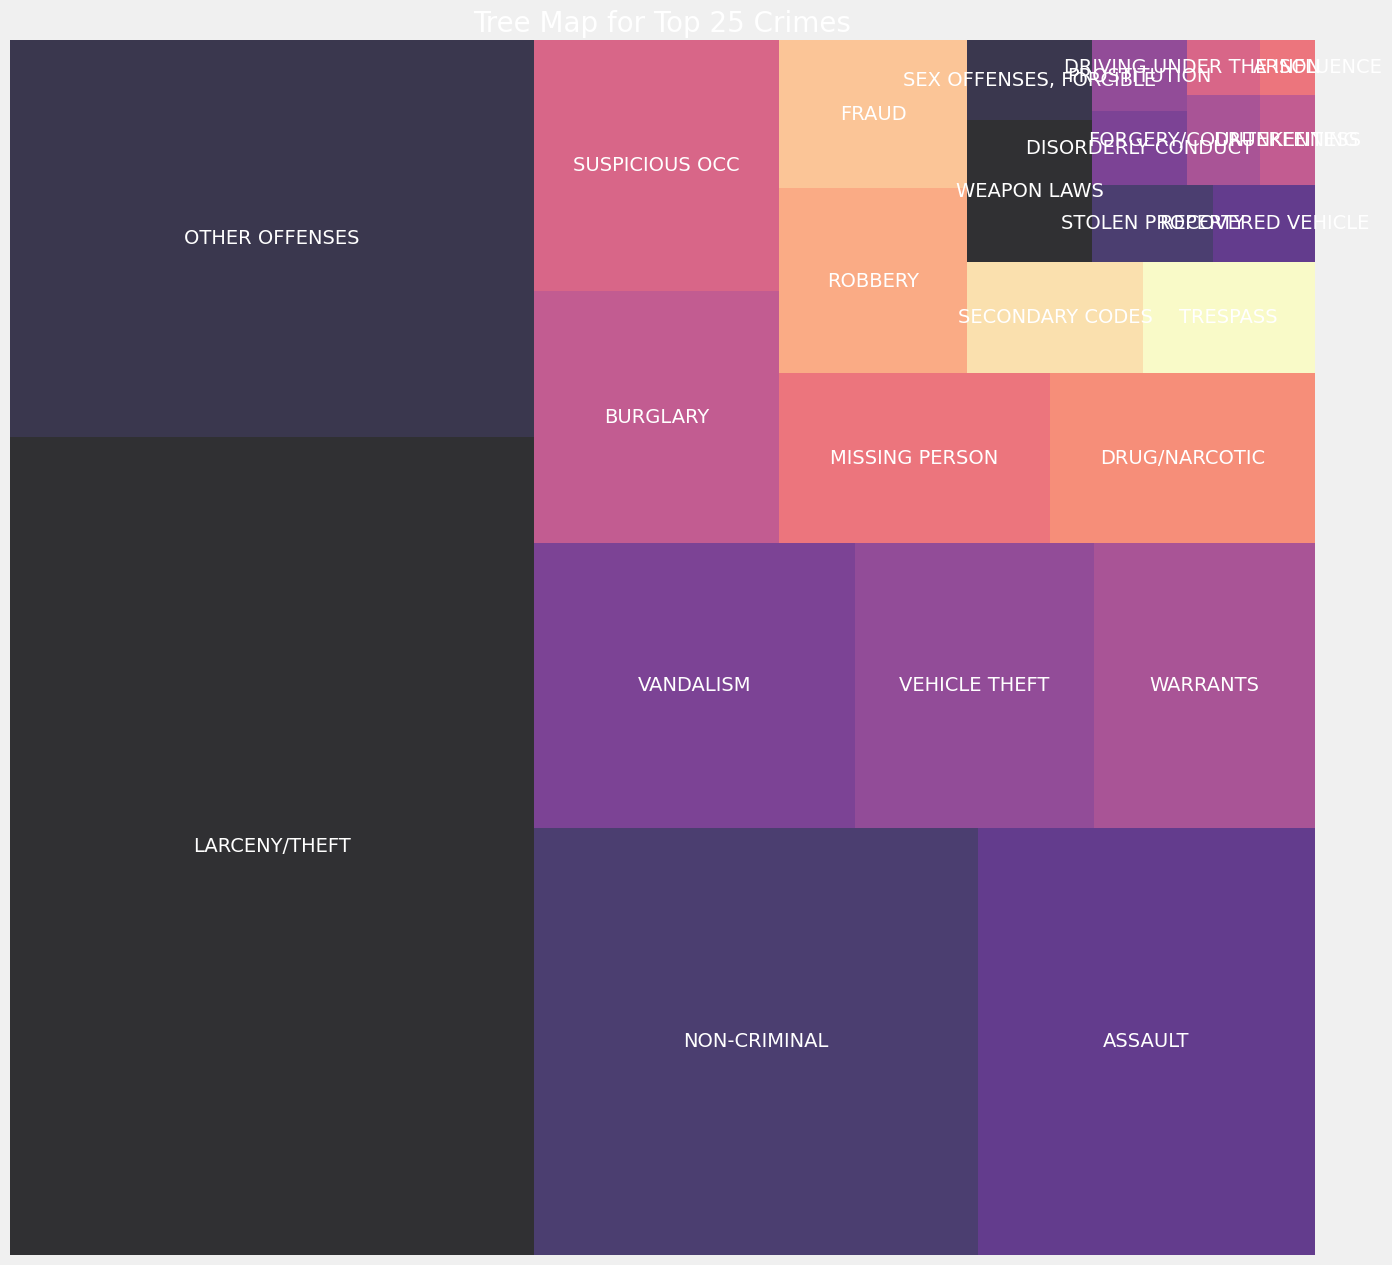

In [9]:
y = df['Category'].value_counts().head(25)

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

##Description of the Crime

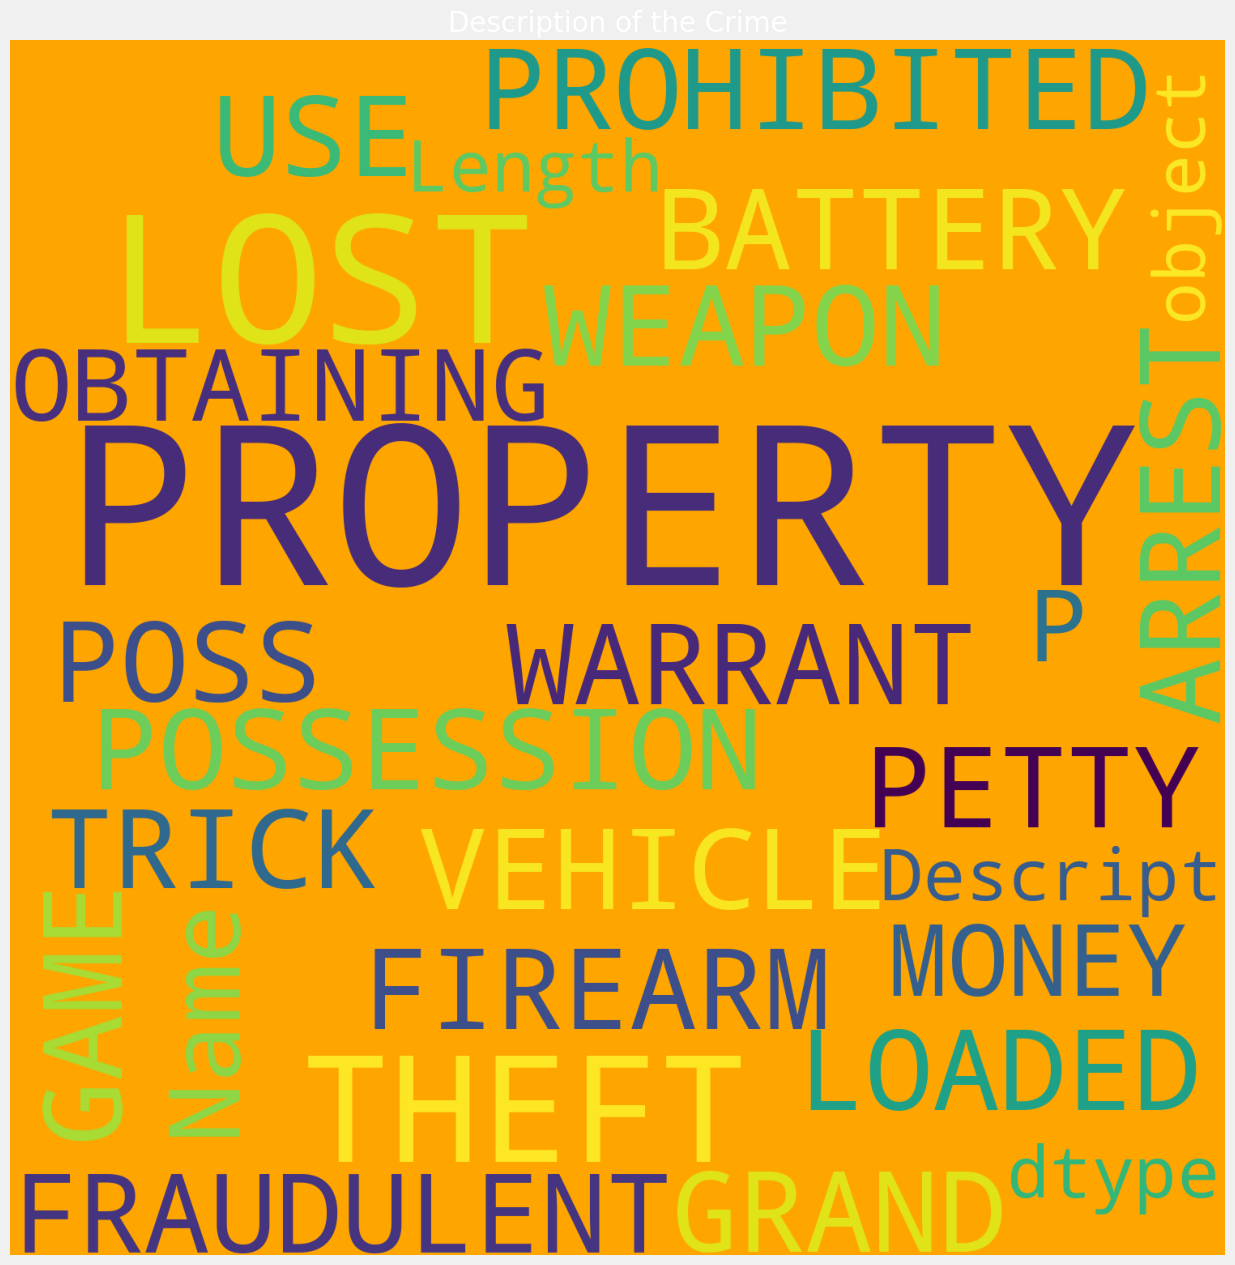

In [10]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['Descript']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

##Regions with count of crimes

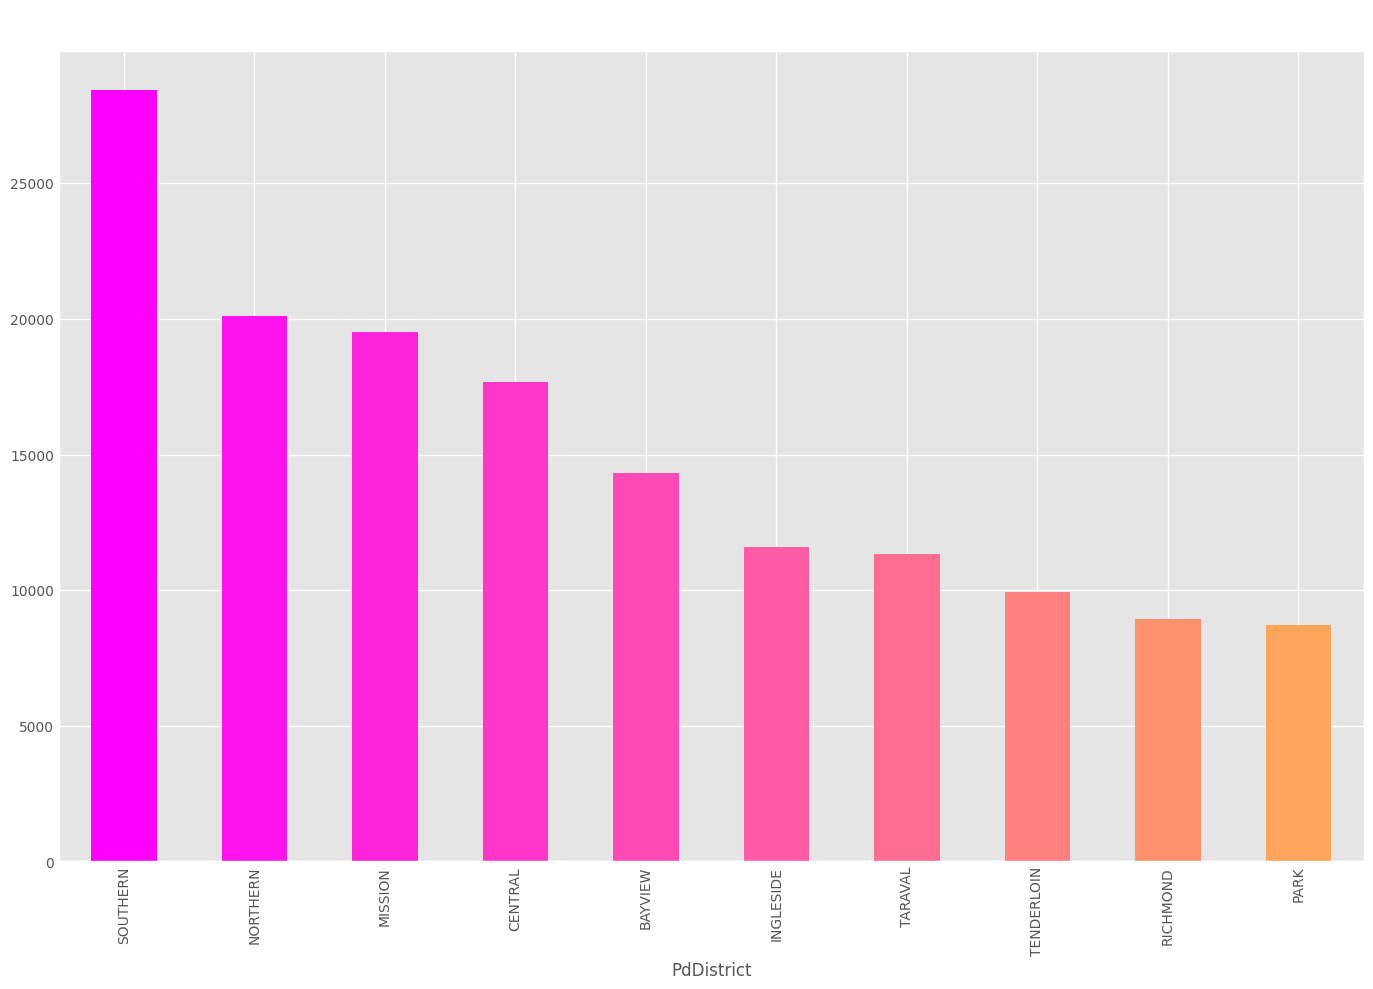

In [11]:
plt.rcParams['figure.figsize'] = (20, 9)
# You can see available styles using plt.style.available
# For example, 'seaborn-v0_8-darkgrid' or 'fivethirtyeight'
# plt.style.use('seaborn') # This line caused the error
plt.style.use('ggplot') # Using a valid style as an example

color = plt.cm.spring(np.linspace(0, 1, 15))
df['PdDistrict'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

##Top 15 Addresses in San Francisco in Crime

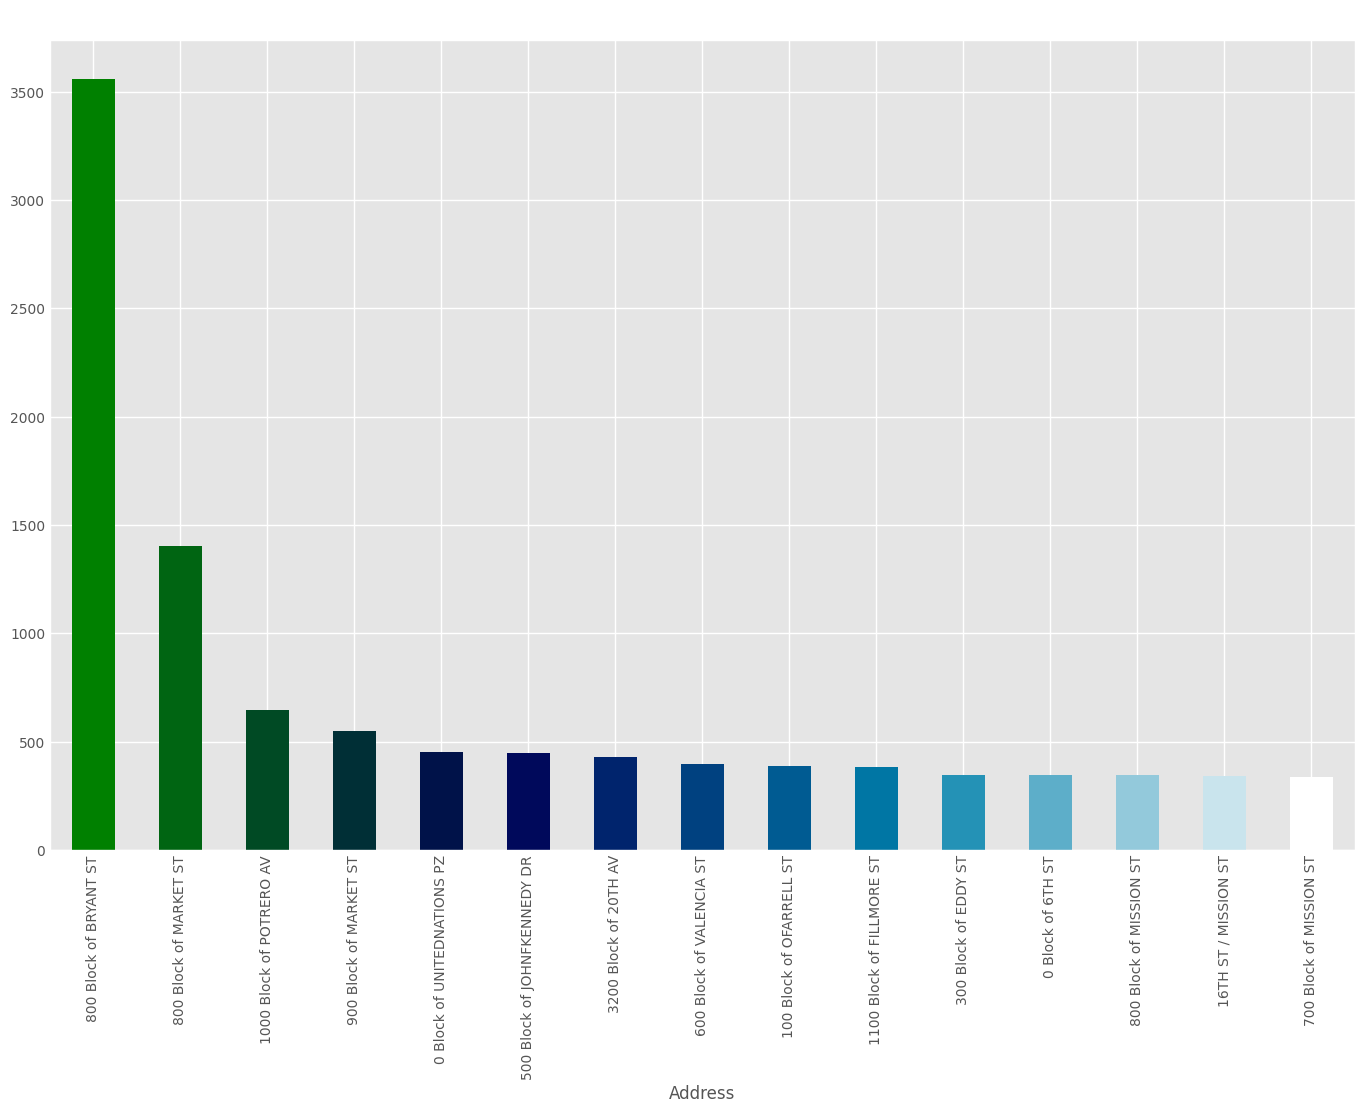

In [12]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('ggplot') # Changed from 'seaborn' to 'ggplot'

color = plt.cm.ocean(np.linspace(0, 1, 15))
df['Address'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

##Regions with days of crimes

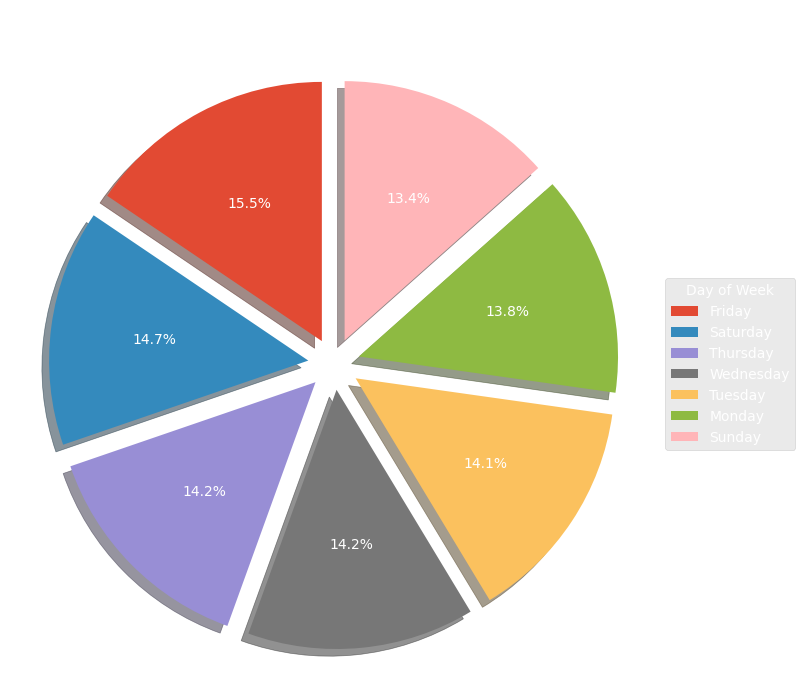

In [15]:
plt.style.use('ggplot')

# Get the value counts for DayOfWeek
day_counts = df['DayOfWeek'].value_counts()

# Create an explode tuple with the correct length
explode_tuple = [0.1] * len(day_counts)

# Plot the pie chart
ax = day_counts.plot.pie(
    figsize=(15, 8),
    explode=explode_tuple,
    autopct='%1.1f%%',     # percentage on slices
    labels=None,           # hide labels on slices
    shadow=True,
    startangle=90
)

# Add legend to show which color belongs to which day
plt.legend(
    day_counts.index,
    title="Day of Week",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Crime count on each day', fontsize=20)
plt.ylabel('')
plt.show()


##Crimes in Each Month

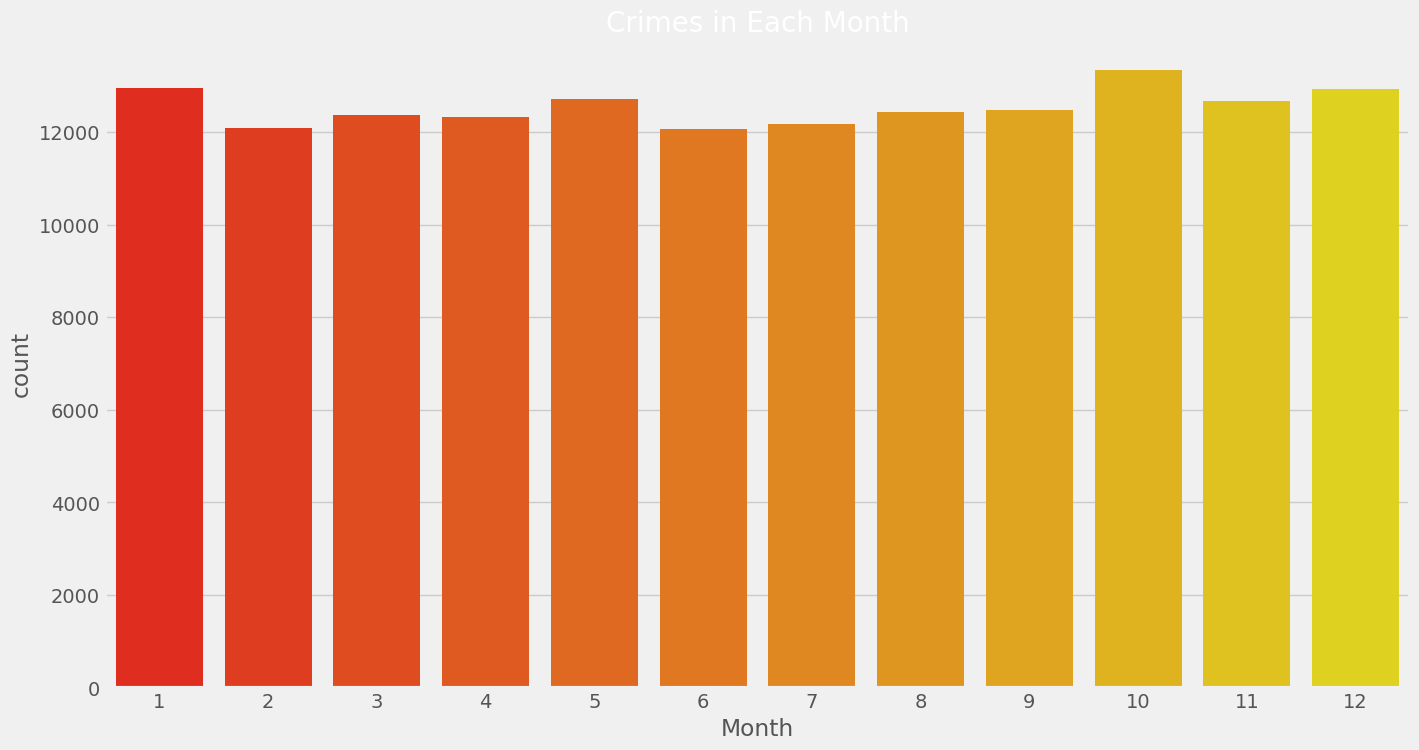

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(x='Month', data=df, palette='autumn')

plt.title('Crimes in Each Month', fontsize=20)
plt.show()


##Checking the time at which crime occurs mostly

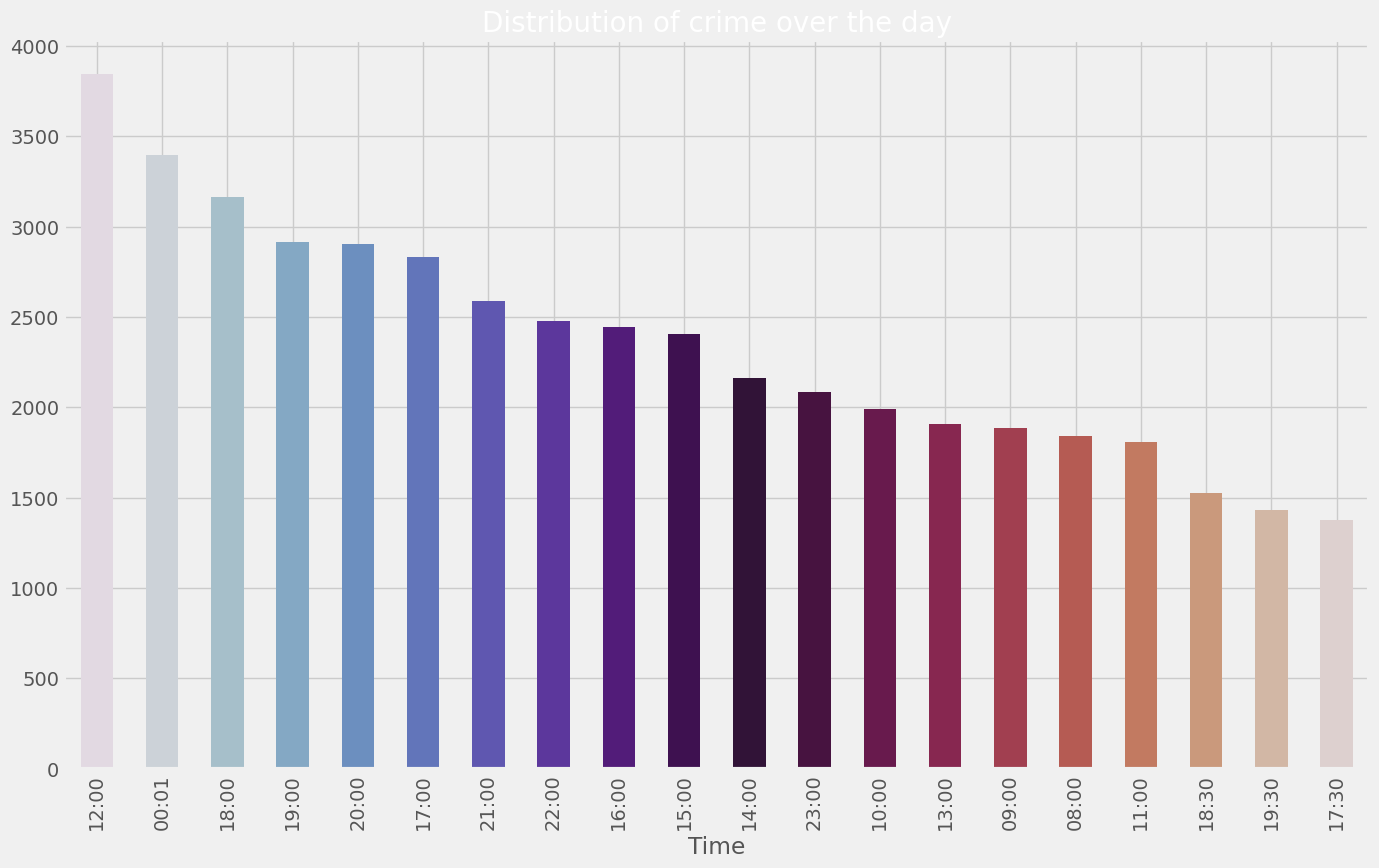

In [18]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

##District vs Category of Crime

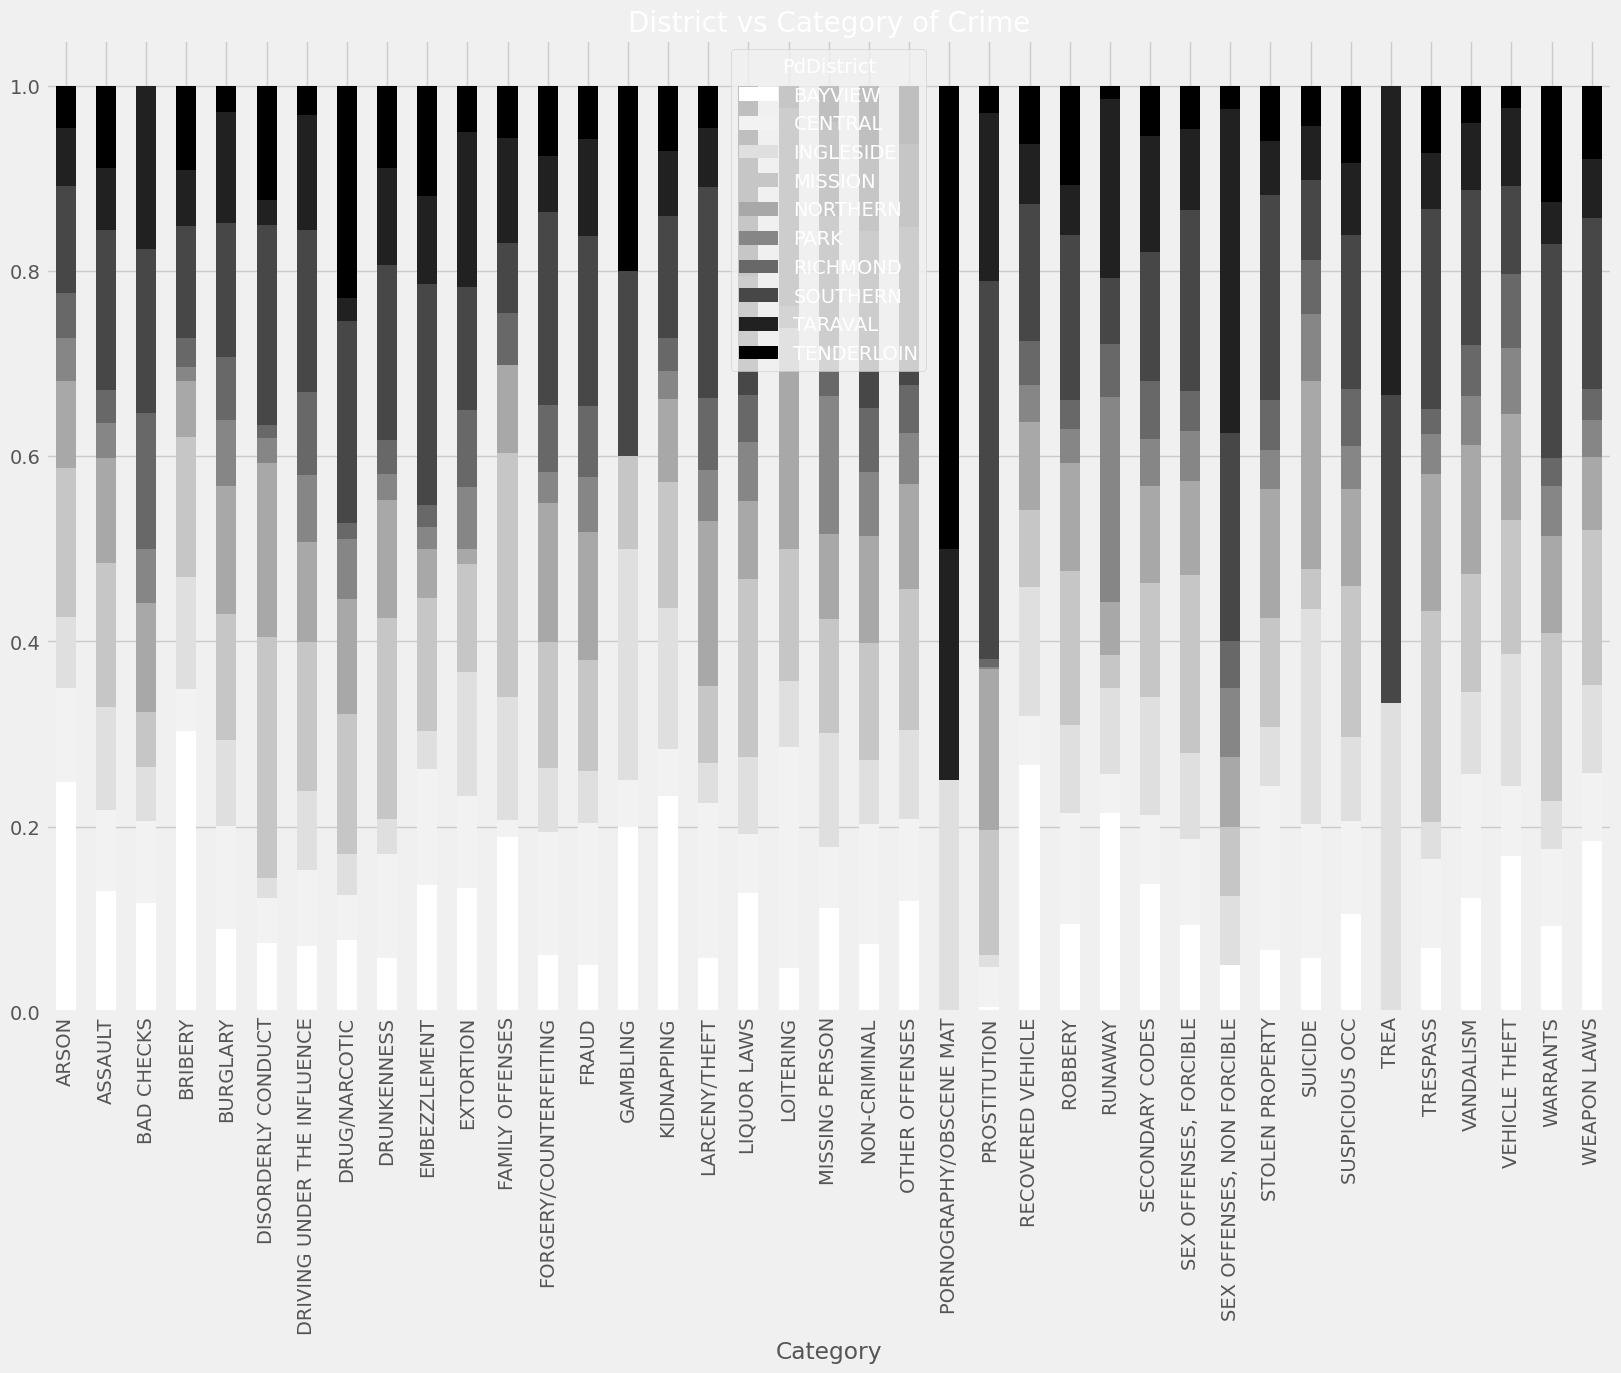

In [19]:
data = pd.crosstab(df['Category'], df['PdDistrict'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

##Geographical Visualization

In [20]:
t = df.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,PdDistrict,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


##Density of crime in San Francisco

In [21]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [24]:
#generate map
folium.Choropleth(
    geo_data=gjson,
    data=table,
    columns=['PdDistrict', 'Count'], # Changed 'Neighborhood' to 'PdDistrict'
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
).add_to(sf_map)

sf_map